<a href="https://colab.research.google.com/github/azmiak/Kuliah-Deep-Learning/blob/main/UTS%20/%20Tensorflow_UTS_RegresiUTSTelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns

In [7]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/RegresiUTSTelkom.csv')
print(df.head())
print(df.info())
df.columns = [f'feature_{i}' for i in range(len(df.columns))]
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print(df_cleaned.info())

   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [8]:
X = df_cleaned.drop(columns=['feature_90'])
y = df_cleaned['feature_90']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#MLP Model

In [12]:
tf_X = df_cleaned.drop(columns=['feature_90'])
tf_y = df_cleaned['feature_90']

# Split data train-test
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, tf_y, test_size=0.2, random_state=42)

# Standarization
tf_scaler = StandardScaler()
tf_X_train_scaled = tf_scaler.fit_transform(tf_X_train)
tf_X_test_scaled = tf_scaler.transform(tf_X_test)

# MLP Model
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(tf_X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilation
tf_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

# Training
tf_history = tf_model.fit(tf_X_train_scaled, tf_y_train,
                          epochs=10,
                          batch_size=64,
                          validation_split=0.1,
                          verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 231.7807 - mae: 9.9356 - val_loss: 106.7092 - val_mae: 7.1415
Epoch 2/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 122.1960 - mae: 7.5890 - val_loss: 93.8824 - val_mae: 6.7149
Epoch 3/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 111.7329 - mae: 7.2990 - val_loss: 90.3235 - val_mae: 6.6112
Epoch 4/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 104.6202 - mae: 7.0769 - val_loss: 90.5010 - val_mae: 6.5791
Epoch 5/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 100.4271 - mae: 6.9699 - val_loss: 93.5687 - val_mae: 6.7032
Epoch 6/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 97.9598 - mae: 6.8795 - val_loss: 85.0229 - val_mae: 6.4239
Epoch 7/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 97.7595 - mae: 6.8491 - val_loss: 89.7232 - val_mae: 6.5846
Epoch 8/10
5796/5796 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 94.9055 - mae: 6.7752 - val_loss: 86.7740 - val_mae: 6.5019
Epoch 9/10

#Regresi

In [13]:
df = pd.read_csv('/content/drive/MyDrive/RegresiUTSTelkom.csv')

# Split feature and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 450295.8438 - val_loss: 279.4684
Epoch 2/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 401.5437 - val_loss: 186.6207
Epoch 3/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 248.4239 - val_loss: 155.3326
Epoch 4/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 204.4845 - val_loss: 233.9987
Epoch 5/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 236.3935 - val_loss: 174.1293
Epoch 6/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 280.8942 - val_loss: 224.9892
Epoch 7/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - loss: 251.9337 - val_loss: 254.7234
Epoch 8/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 184.2829 - val_loss: 109.7731
Epoch 9/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 176.4936 - val_loss: 131.9806
Epoch 10/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 174.4921 - val_loss: 147.5947
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


MSE: 149.365478515625
RMSE: 12.221517030042751
R2: -0.25847768783569336


<ipython-input-16-fab9a173b856>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', c='blue')


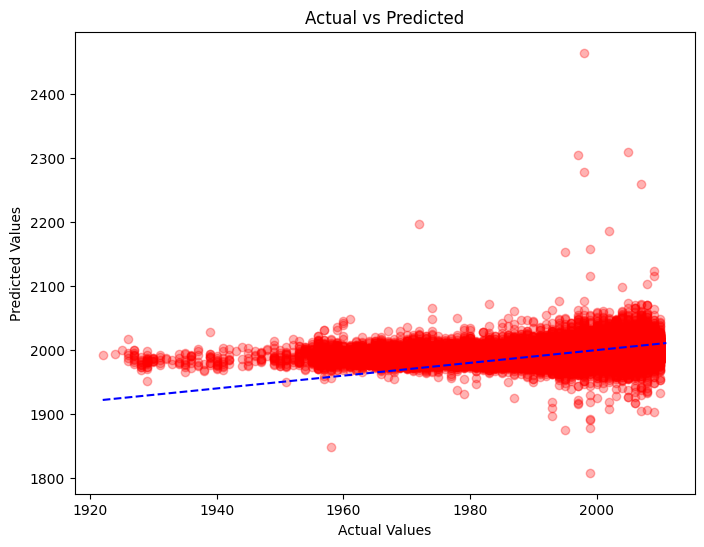

In [16]:
# Eval
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, c='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', c='blue')
plt.show()

In [17]:
median_value = y.median()
y_class = (y > median_value).astype(int)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y = df.iloc[:, 0]
X = df.iloc[:, 1:]
median_value = y.median()
y_class = (y > median_value).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Predict
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7047 - loss: 0.5716 - val_accuracy: 0.7301 - val_loss: 0.5401
Epoch 2/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7329 - loss: 0.5340 - val_accuracy: 0.7339 - val_loss: 0.5358
Epoch 3/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7391 - loss: 0.5257 - val_accuracy: 0.7367 - val_loss: 0.5290
Epoch 4/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7427 - loss: 0.5198 - val_accuracy: 0.7380 - val_loss: 0.5273
Epoch 5/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7456 - loss: 0.5142 - val_accuracy: 0.7376 - val_loss: 0.5272
Epoch 6/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7480 - loss: 0.5108 - val_accuracy: 0.7381 - val_loss: 0.5283
Epoch 7/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7495 - loss: 0.5076 - val_accuracy: 0.7373 - val_loss: 0.5291
Epoch 8/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 

Accuracy: 0.7385
Precision: 0.7220
Recall: 0.7328
F1-Score: 0.7274
AUC-ROC: 0.8148


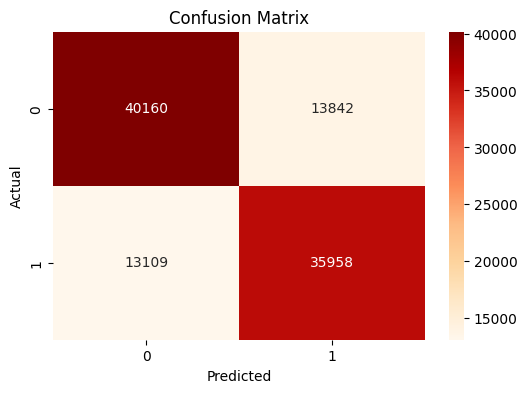

In [21]:
# Evaluation
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Evaluasi Metrik

Accuracy: 0.7385 → 73.85% data diprediksi benar.

Precision: 0.7220 → Dari semua prediksi 1, 72.20% benar.

Recall: 0.7328 → Dari semua kelas 1 yang sebenarnya, 73.28% terdeteksi.

F1-Score: 0.7274 → Harmonic mean dari precision dan recall.

AUC-ROC: 0.8148 → Baik; model mampu membedakan positif dan negatif.

Metrik yang paling menonjol di sini adalah AUC-ROC sebesar 0.8142, yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif. AUC-ROCunggul karena mengukur area di bawah kurva ROC yang memplot true positive rate vs false positive rate pada berbagai threshold. Meskipun kita mengubah threshold prediksi, model masih mempertahankan performa yang baik. AUC-ROC menjadi metrik terbaik karena memberikan gambaran kualitas klasifikasi model.